# Preferential Attachment & Machine Learning


## Expiramental settings
Fix $N >> 1$, the total number of balls we wish to distribute.
- Choose $1≤ m ≤10$, the number of balls thrown at each iteration.
- Choose $1 ≤ k_0 ≤ 10$, the initial number of balls that each newly created urn has.
- Run as many iterations as necessary to distribute all the balls, proportional to the number of balls in each urn (preferential attachment).
- Compute a summary of the distribution in a vector $P$, so that $P[i]$ is the number of urns that have precisely $i$ balls.

Now, feed the vectors to a deep neural network, whose purpose is to learn $k_0$ and $m$ from vector $P$.


In [1]:
# matplotlib.pyplot.loglog
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

import seaborn as sns
# sns.set_style("white")

In [3]:
def preferential_attachment(N, m, k0):
    """Distributes 𝑁 >> 1 balls among urns iteratively using preferential attachment policy.
        At each step, add an urn with 𝑘0 balls and distribute m balls among urns 
        with probablility proportional to the number of balls in each urn.
        Run as many iterations as necessary to distribute all 𝑁 balls.

    Parameters:
        𝑁  (int): 𝑁 >> 1, the total number of balls we wish to distribute.
        m  (int): 1≤ 𝑚 ≤10, the number of balls thrown at each iteration.
        𝑘0 (int): 1≤ 𝑘0 ≤10, the initial number of balls that each newly created urn has.

    Returns:
        urns vector(int):  urns[𝑖] contains the number of balls distributed to the 𝑖-th urn.
        P vector(int): Vector 𝑃, such that 𝑃[𝑖] is the number of urns that have precisely 𝑖 balls.

   """

    urns = np.array([], dtype=int)
    total_balls_distributed = 0

    # iterations
    n = N
    while n > 0:
        # add a new urn with k0 balls
        urns = np.append(urns, k0)

        total_balls_distributed += k0

        # do preferential selection of m urns proportioanl to the number of balls at each urn

        probs = urns / total_balls_distributed
        #print(probs)

        # we want the indices of the selected cells, not their values, 
        # so random choice from an index array of len(urns)
        urn_indices = list(range(len(urns)))
        num_balls_distributed = min(m, n) # because n might not be a multiple of m
        idx = np.random.choice(urn_indices, size=num_balls_distributed, p=probs)

        # distribute m balls among the selected urns 
        # (an urn may get more than one ball!)
        for i in range(len(idx)):
            urns[idx[i]] += 1

        total_balls_distributed += m
        n -= m

    # initialize an output array of size [0 .. max(urns)]
    P = np.zeros((1+int(max(urns)),), dtype=int)
    for i in range(len(urns)):
        num_balls_in_urns_i = int(urns[i])
        P[num_balls_in_urns_i] += 1
    
    return urns, P


In [4]:
# def distplot(x, bins=50, title='preferential attachment', xlabel='x', ylabel='Frequency'):
#     kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':1})
#     plt.figure(figsize=(10,7), dpi= 80)
#     sns.distplot(x, bins=bins, **kwargs)
#     plt.xlim(0)
# distplot(urns, bins=max_balls, xlabel='balls', ylabel='urns');

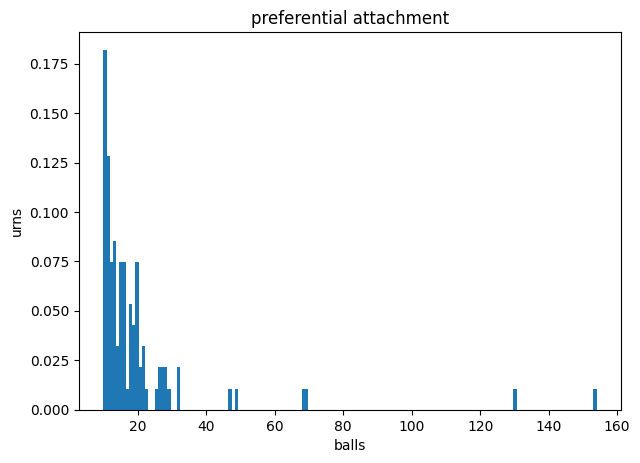

In [5]:
urns, P = preferential_attachment(N=1000, m=10, k0=10)

# plot a histogram on urns
max_balls = np.max(urns)
plt.hist(urns, bins=max_balls, density=True);
plt.gca().set(title='preferential attachment', xlabel='balls', ylabel='urns');